# <b><font color="#2cb8b2"> QuantiCore S.A - Estadísticas de Educación en Colombia (2011-2023) </font></b>

## <b><font color="#3ddb8f"> Análisis exploratorio y Visualizaciones de Datos </font></b>

_______________________________________________________________

### <b><font color="#3ddb8f"> Enfoque del análisis: Deserción escolar</font></b>

## 📌 Objetivo general
Analizar los factores que influyen en la deserción escolar en Colombia, con énfasis en sus diferentes niveles (transición, primaria, secundaria y media), utilizando datos agregados por municipio, año y departamento.

_______________________________________________________________

### <b><font color="#a9f04d"> Importar librerías </font></b>

In [6]:
# Importamos las librerias principales
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import display
import folium
from folium.features import GeoJsonTooltip
%matplotlib inline

### <b><font color="#a9f04d"> Importar el Dataset </font></b>

In [7]:
df_data = pd.read_csv("../data/dataset_nuevo.csv")

### <b><font color="#268fbe"> 1. Análisis exploratorio de los indicadores </font></b>

Enfoque del análisis: Deserción escolar
📌 Objetivo general
Analizar los factores que influyen en la deserción escolar en Colombia, con énfasis en sus diferentes niveles (transición, primaria, secundaria y media), utilizando datos agregados por municipio, año y departamento.

#### <b><font color="#551bb3"> 1.1.1 Análisis Descriptivo</font></b>

In [8]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AÑO,14585.0,2016.999383,3.741392,2011.000000,2014.000000,2017.000000,2020.00,2.023000e+03
CÓDIGO_MUNICIPIO,14585.0,38693.103668,26554.514246,0.000000,15676.000000,25839.000000,66572.00,9.977300e+04
CÓDIGO_DEPARTAMENTO,14585.0,38.259376,26.567883,0.000000,15.000000,25.000000,66.00,9.900000e+01
CÓDIGO_ETC,14585.0,3540.942818,1126.820167,0.000000,3769.000000,3785.000000,3805.00,1.093000e+04
POBLACIÓN_5_16,14585.0,12950.168324,145575.392605,0.000000,1477.000000,3078.000000,6498.00,9.548263e+06
TASA_MATRICULACIÓN_5_16,14585.0,84.945598,18.678155,0.000000,74.850000,85.340000,95.39,2.790300e+02
COBERTURA_NETA,14585.0,85.499540,17.032674,0.000000,76.850000,86.330000,94.54,2.645400e+02
COBERTURA_NETA_TRANSICIÓN,14585.0,57.715734,16.197464,0.000000,47.560000,57.900000,68.00,1.504700e+02
COBERTURA_NETA_PRIMARIA,14585.0,82.606272,17.223897,0.000000,73.280000,82.820000,91.93,2.549600e+02
COBERTURA_NETA_SECUNDARIA,14585.0,69.880112,18.924568,0.000000,60.360000,70.830000,80.53,2.294400e+02


In [9]:
#Análisis de las columnas relacionadas con la deserción

desercion_cols = ["DESERCIÓN", "DESERCIÓN_TRANSICIÓN","DESERCIÓN_PRIMARIA", "DESERCIÓN_SECUNDARIA","DESERCIÓN_MEDIA"]

for col in desercion_cols:
    print(f"{col}")
    print(f"Media: {df_data[col].mean():.3f}")
    print(f"Mediana: {df_data[col].median():.3f}")
    print(f"Desviación estándar: {df_data[col].std():.3f}")
    print(f"Máximo: {df_data[col].max():.3f}")
    print(f"Mínimo: {df_data[col].min():.3f}")
    print(f"Valores nulos: {df_data[col].isnull().sum()} de {len(df_data)} registros\n")


DESERCIÓN
Media: 3.503
Mediana: 3.140
Desviación estándar: 2.186
Máximo: 27.900
Mínimo: -1.047
Valores nulos: 0 de 14585 registros

DESERCIÓN_TRANSICIÓN
Media: 3.425
Mediana: 2.910
Desviación estándar: 2.860
Máximo: 42.860
Mínimo: -12.472
Valores nulos: 0 de 14585 registros

DESERCIÓN_PRIMARIA
Media: 2.757
Mediana: 2.320
Desviación estándar: 2.093
Máximo: 21.264
Mínimo: -4.869
Valores nulos: 0 de 14585 registros

DESERCIÓN_SECUNDARIA
Media: 4.593
Mediana: 4.040
Desviación estándar: 3.194
Máximo: 47.140
Mínimo: -12.022
Valores nulos: 0 de 14585 registros

DESERCIÓN_MEDIA
Media: 3.421
Mediana: 2.780
Desviación estándar: 3.392
Máximo: 62.500
Mínimo: -12.663
Valores nulos: 0 de 14585 registros



### <b><font color="#268fbe"> 2. Visualización de datos </font></b>

<Axes: title={'center': 'Valores unicos por feature'}>

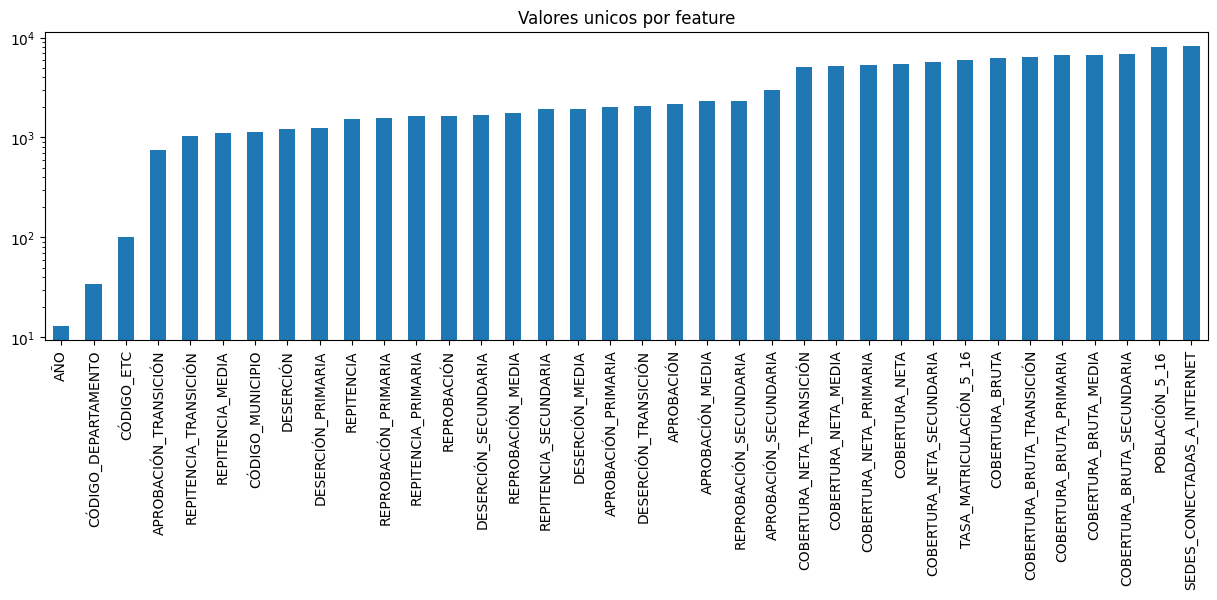

In [10]:
# Para cada característica numérica, calcula el número de entradas únicas
valores_unicos = df_data.select_dtypes(include="number").nunique().sort_values()

# Información gráfica con eje y en escala logarítmica
valores_unicos.plot.bar(logy=True, figsize=(15, 4), title="Valores unicos por feature")


<b>Interpretación</b>

Esta gráfica muestra el número de valores únicos por cada variable, en un conjunto de datos relacionados con educación en Colombia. El eje Y está en escala logarítmica, lo cual indica que hay gran variabilidad entre las columnas en cuanto a su cardinalidad (número de valores únicos).

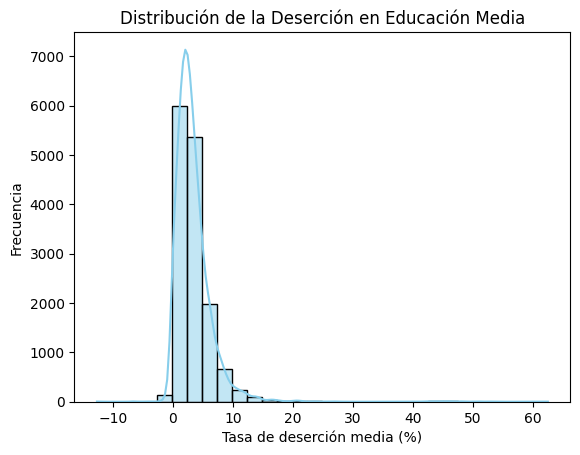

In [11]:
sns.histplot(df_data['DESERCIÓN_MEDIA'], kde=True, bins=30, color='skyblue')
plt.title('Distribución de la Deserción en Educación Media')
plt.xlabel('Tasa de deserción media (%)')
plt.ylabel('Frecuencia')
plt.show()

<b>Interpretación</b>

* Concentración de Datos: La gran mayoría de las tasas de deserción se concentran en valores muy bajos, específicamente entre 0% y aproximadamente 5%. La barra más alta del histograma se encuentra en este rango.

* La deserción en educación media es un problema que, en la mayoría de los casos, se mantiene en niveles bajos (por debajo del 5%). Sin embargo, la presencia de una cola larga y valores extremos (aunque con baja frecuencia) indica que hay casos críticos con tasas de deserción excepcionalmente altas. Estos casos, aunque menos frecuentes, son importantes y probablemente requieren una atención específica.

#### <b><font color="#551bb3"> 2.3 Evolución de la deserción escolar por año y nivel educativo</font></b>

In [12]:

tab_contents = {}
custom_colors = ["#551bb3", "#268fbe", "#2cb8b2", "#3ddb8f", "#a9f04d"]
for col in desercion_cols:
    df_agrupado = df_data.groupby('AÑO')[col].mean().reset_index()
    fig = px.line(
        df_agrupado,
        x='AÑO',
        y=col,
        markers=True,
        title=f'Evolución de la deserción ({col.replace("_", " ").title()}) por año',
        labels={col: 'Tasa promedio de deserción', 'AÑO': 'Año'},
        color_discrete_sequence=[custom_colors[desercion_cols.index(col) % len(custom_colors)]]
    )
    fig.update_layout(yaxis_title='Tasa promedio de deserción', xaxis_title='Año')
    tab_contents[col] = fig

tab = widgets.Tab()
tab.children = [widgets.Output() for _ in tab_contents]
for i, title in enumerate(tab_contents.keys()):
    tab.set_title(i, title)

for i, (title, fig) in enumerate(tab_contents.items()):
    with tab.children[i]:
        fig.show()

display(tab)

<b>Interpretación</b>

Se observa una tendencia común en todos los niveles, con descensos alrededor de 2019-2020 seguidos de aumentos en 2021 y 2022.  Esto podría indicar un factor externo o evento que impactó la deserción en esos años, posiblemente relacionado con la pandemia de COVID-19 y sus efectos en la educación.
Nivel de deserción: La deserción secundaria tiende a ser la más alta, mientras que la primaria es la más baja entre los niveles presentados.
A partir de 2020, se evidencia un incremento en las tasas de deserción en casi todos los niveles, lo que sugiere un posible desafío en la retención estudiantil en los años más recientes. 

 #### <b><font color="#551bb3"> 2.4 Top 30 municipios con mayor deserción escolar por año</font></b>

In [14]:
fecha = sorted(df_data["AÑO"].unique())

tab_contents = {}

for fecha in fecha:
    df_filtrado = df_data[df_data["AÑO"] == fecha]
    top_desercion = df_filtrado.nlargest(30, "DESERCIÓN")
    fig = px.bar(
        top_desercion,
        x="DESERCIÓN",
        y="MUNICIPIO",
        orientation="h",
        color="DESERCIÓN",
        color_continuous_scale=custom_colors,
        title=f"Top 30 municipios con mayor deserción ({fecha})",
        labels={"DESERCIÓN": "Tasa de deserción (%)", "MUNICIPIO": "Municipio"},
        animation_frame="AÑO",
        height=600,
    )
    fig.update_layout(
        yaxis={'categoryorder':'total ascending'},
        title_font=dict(size=18, color=custom_colors[0]),
        xaxis_title_font=dict(size=14),
        yaxis_title_font=dict(size=14),
        plot_bgcolor="#f9f9f9",
        paper_bgcolor="#f9f9f9",
    )
    tab_contents[str(fecha)] = fig

tab = widgets.Tab()
tab.children = [widgets.Output() for _ in tab_contents]
for i, title in enumerate(tab_contents.keys()):
    tab.set_title(i, title)

for i, (title, fig) in enumerate(tab_contents.items()):
    with tab.children[i]:
        fig.show()

display(tab)

<b>Interpretación</b>

Muchos municipios en el top 30 comparten características comunes:
* Ubicación rural y dispersa.
* Alta presencia de población étnica (indígena y afrodescendiente).
* Historial de conflicto armado o presencia de economías ilícitas.
* Limitado acceso a infraestructura y conectividad.

Esto refuerza la necesidad de medidas contextualizadas y diferenciales en zonas apartadas del país, más allá de intervenciones generales.

 #### <b><font color="#551bb3"> 2.5 Tasa de deserción escolar por niveles educativos (Transición, Primaria, Secundaria y Media) por año</font></b>

In [15]:
niveles = [
    "DESERCIÓN_TRANSICIÓN",
    "DESERCIÓN_PRIMARIA",
    "DESERCIÓN_SECUNDARIA",
    "DESERCIÓN_MEDIA"
]


date = sorted(df_data["AÑO"].unique())

tab_contents = {}

for date in date:
    df_date = df_data[df_data["AÑO"] == date]
    medias = [df_date[nivel].mean() for nivel in niveles]
    fig = go.Figure(
        data=[
            go.Bar(
                x=niveles,
                y=medias,
                marker_color=custom_colors,
                text=[f"{v:.2f}%" for v in medias],
                textposition="auto"
            )
        ]
    )
    fig.update_layout(
        title=f"Tasa de deserción escolar promedio por nivel educativo ({date})",
        xaxis_title="Nivel educativo",
        yaxis_title="Tasa promedio de deserción (%)",
        xaxis_tickangle=20,
        plot_bgcolor="#f9f9f9",
        paper_bgcolor="#f9f9f9",
        font=dict(family="Arial", size=14),
        height=450
    )
    tab_contents[str(date)] = fig

tab = widgets.Tab()
tab.children = [widgets.Output() for _ in tab_contents]
for i, title in enumerate(tab_contents.keys()):
    tab.set_title(i, title)

for i, (title, fig) in enumerate(tab_contents.items()):
    with tab.children[i]:
        fig.show()
display(tab)

<b>Interpretación</b>

 Hallazgos importantes

* Mayor deserción en secundaria, sostenidamente por encima del 5% en varios años.
* Primaria muestra una evolución positiva, alcanzando su punto más bajo en 2023.
* Transición y media muestran oscilaciones, pero con una tendencia general hacia la mejora.
* El impacto del año 2021 (pospandemia) parece evidente, especialmente en secundaria y media.

 #### <b><font color="#551bb3"> 2.6 Cantidad de estudiantes estudiados de 5 a 16 años de edad, segregado por Departamentos y Municipios </font></b>

In [16]:
departamentos = [
    "Atlántico",
    "Antioquia",
    "Valle del Cauca",
    "Santander",
    "Cundinamarca",
    "Bolívar",
    "Caldas",
    "Cesar",
]

custom_colors = ["#551bb3", "#268fbe", "#2cb8b2", "#3ddb8f", "#a9f04d"]

tab_contents = {}

for depto in departamentos:
    pivot = df_data[df_data["DEPARTAMENTO"] == depto].pivot(
        index="MUNICIPIO", columns="AÑO", values="POBLACIÓN_5_16"
    )
    fig = px.imshow(
        pivot,
        color_continuous_scale=custom_colors,
        labels=dict(x="Año", y="Municipio", color="Población(5-16 años)"),
    )
    fig.update_layout(
        title=f"Cantidad de estudiantes por municipio - {depto}",
        width=1000,
        height=800,
    )
    tab_contents[depto] = fig

tab = widgets.Tab()
tab.children = [widgets.Output() for _ in tab_contents]
for i, title in enumerate(tab_contents.keys()):
    tab.set_title(i, title)

for i, (title, fig) in enumerate(tab_contents.items()):
    with tab.children[i]:
        fig.show()

display(tab)


<b>Interpretación</b>

Entre los departamentos que concentran mayor población estudiantil se encuentran Atlántico, Antioquia, Bolivar, Valle del Cauca y Caldas, con un promedio  entre los 150k a 300k, las mayores variaciones se dieron entre 2018 y 2020, se presume que fue a causa de la pandemia.
Algunos departamentos pueden tener una población mucho menor, lo cual puede reflejar dispersión geográfica o baja densidad poblacional.
Pandemia y brecha tecnológica (falta de internet y dispositivos) afectaron continuidad académica especialmente en zonas .

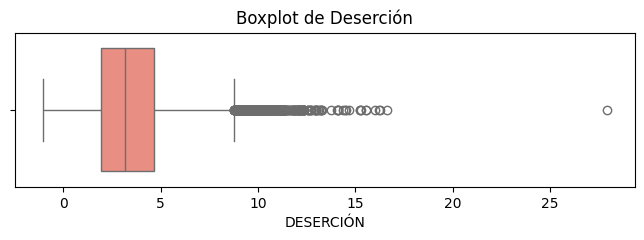

In [17]:
# Boxplot para detectar outliers
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_data['DESERCIÓN'], color='salmon')
plt.title('Boxplot de Deserción')
plt.show()

<b>Interpretación</b>

* Forma de la distribución:
La mayoría de los municipios tienen tasas de deserción media bajas, pero hay unos pocos donde la deserción es mucho más alta que lo normal. Por eso, el gráfico se ve "cargado" hacia la izquierda y con una cola más larga hacia la derecha.

* Valores más comunes:
En la mitad de los municipios, las tasas de deserción media están entre 1% y 4 o 5%. Es decir, esos son los valores más frecuentes en el país.

* Casos extremos (outliers):
Hay varios municipios donde la deserción llega a ser muy alta, incluso pasando del 9% hasta casi el 28%. Estos casos son atípicos y llaman la atención, ya que podrían reflejar problemas graves o particulares que no ocurren en la mayoría del país. Sería importante investigar qué ocurre en esos lugares.

 ### <b><font color="#268fbe"> 3. Análisis de correlación de variables</font></b>

 #### <b><font color="#551bb3"> 3.1 Matriz de correlación</font></b>

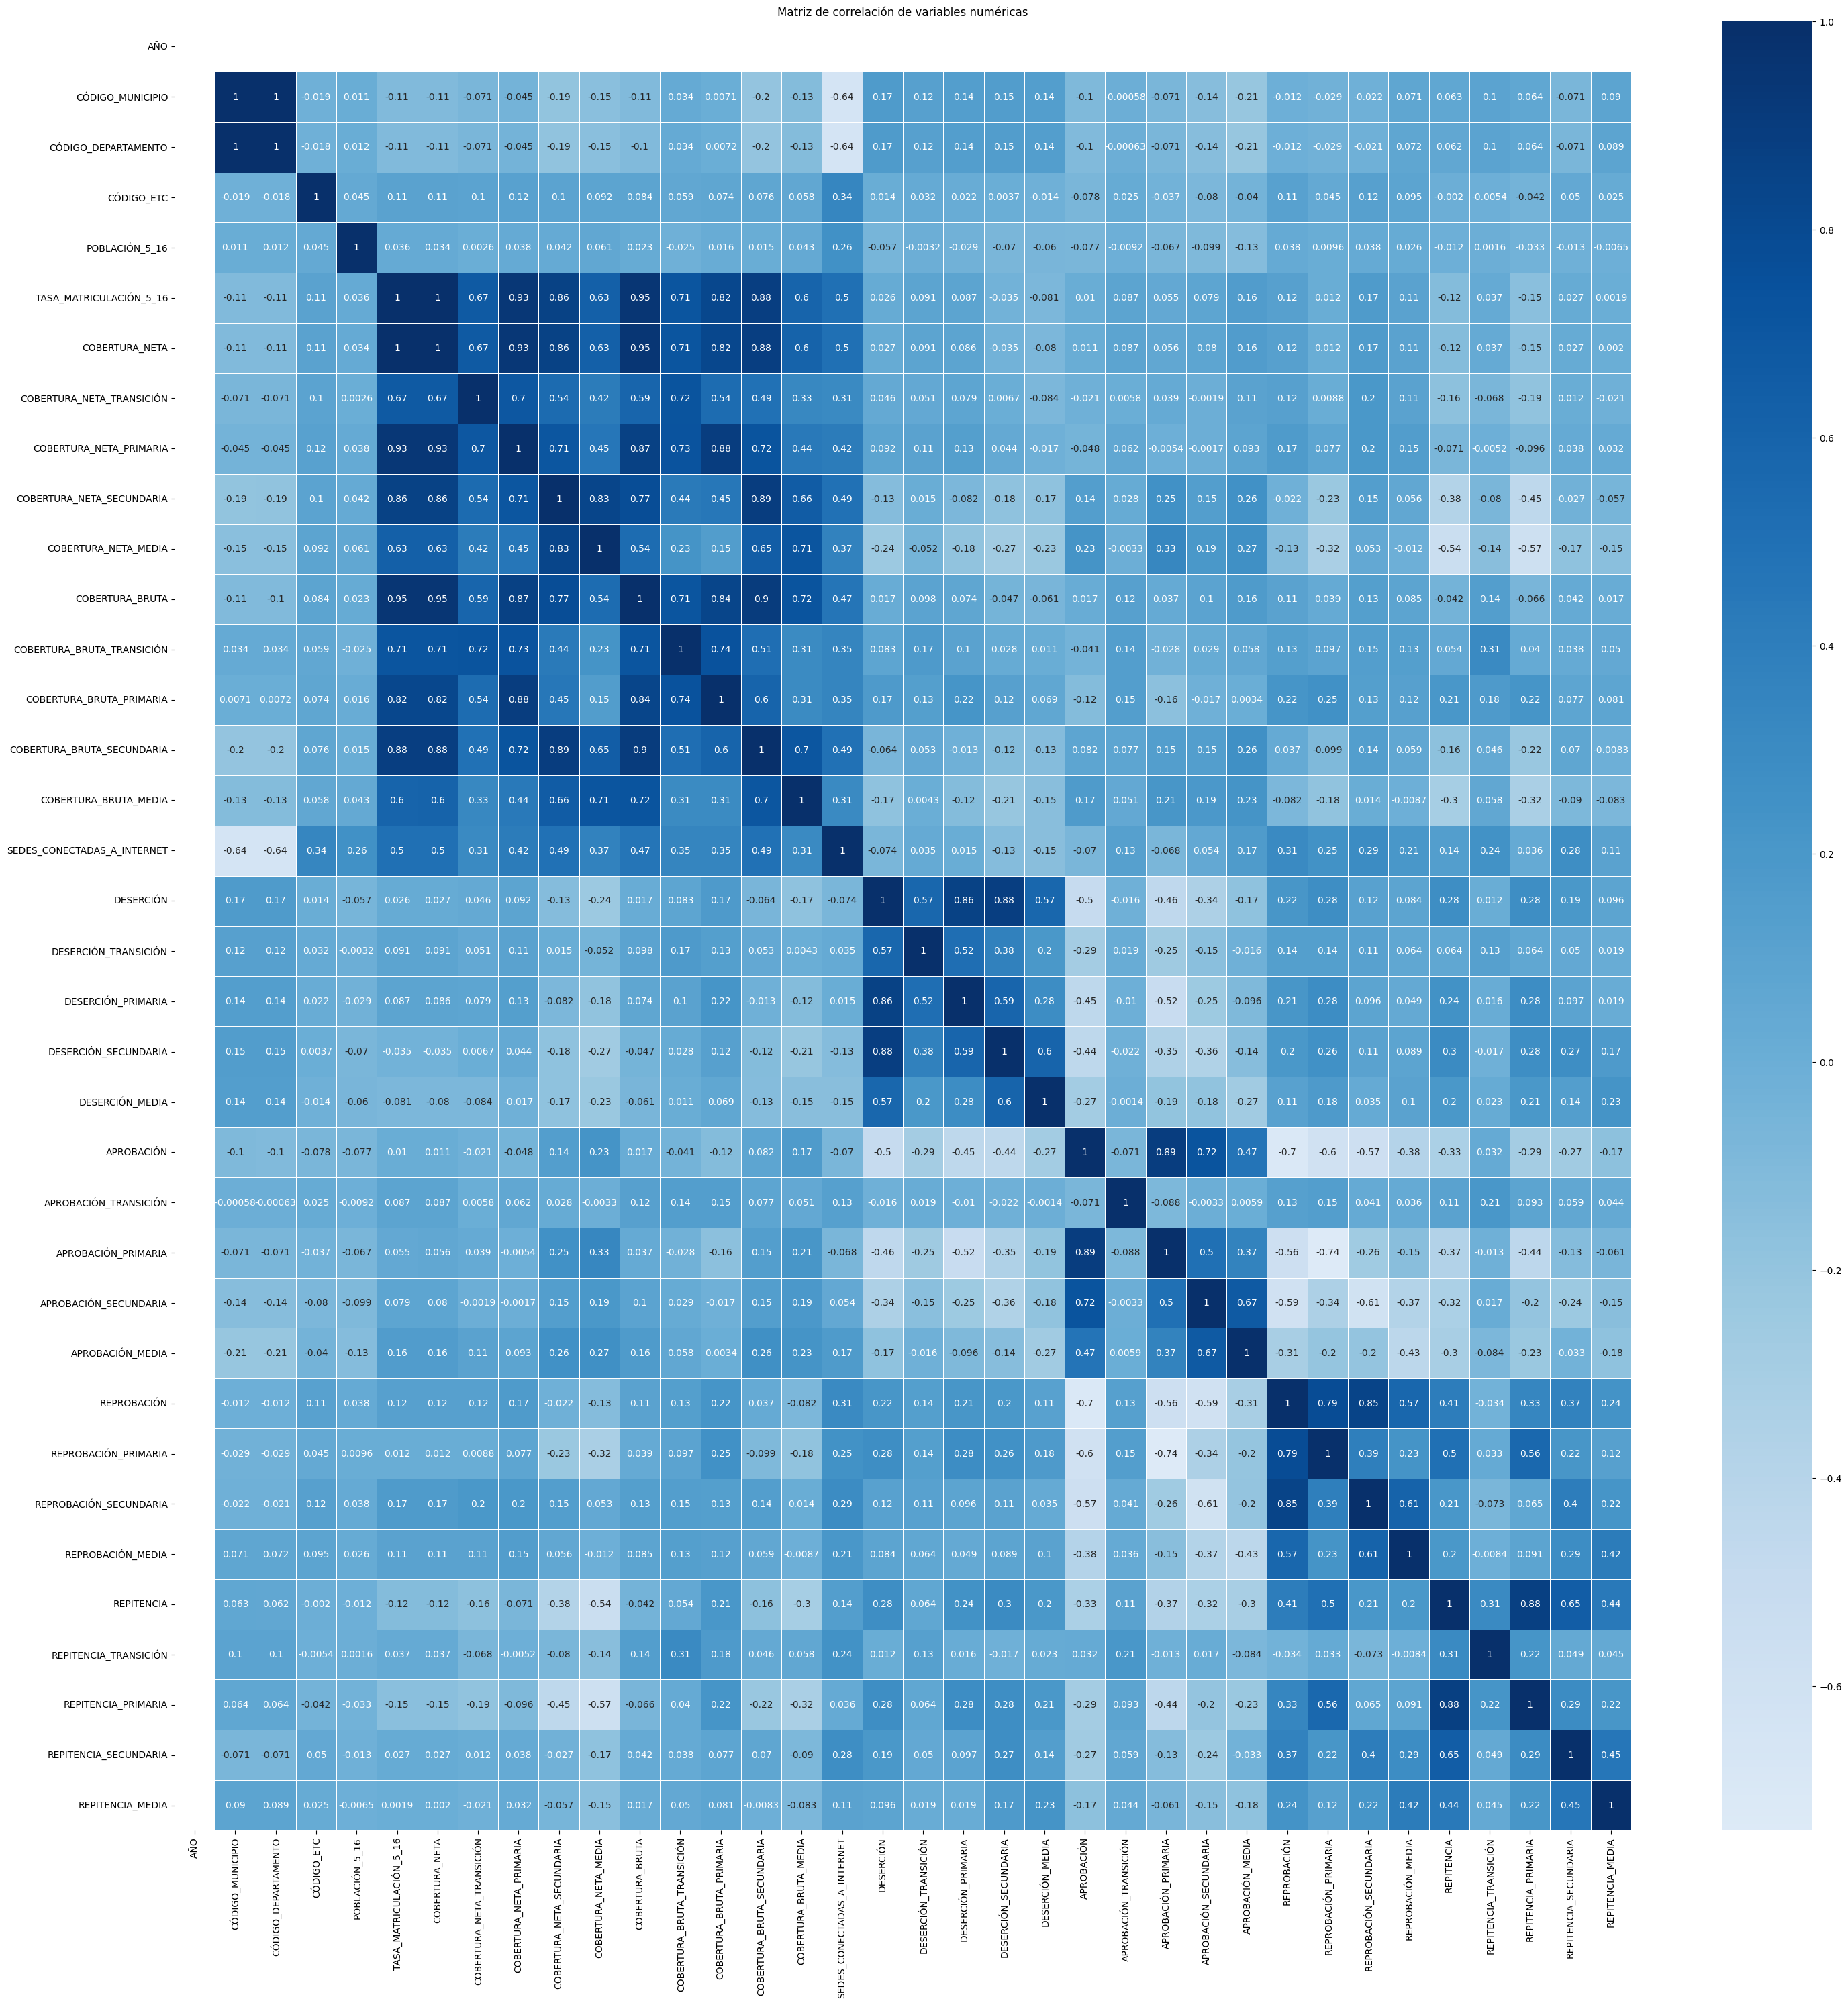

In [18]:
plt.figure(figsize=(35, 35))
corr = df_filtrado.corr(numeric_only=True)
sns.heatmap(corr, annot=True,linewidths=.5, cmap = 'Blues' , center=0)
plt.title("Matriz de correlación de variables numéricas")
plt.show()


<b>Interpretación</b>

1- Factores académicos están altamente relacionados con la deserción en media.
* Reprobación y repitencia están fuertemente ligados al abandono escolar.
* Una buena tasa de aprobación reduce notablemente la deserción.

2- La dimensión más crítica es la del nivel “media” (secundaria superior).

Los valores específicos para media (APROBACIÓN_MEDIA, REPROBACIÓN_MEDIA, REPITENCIA_MEDIA) tienen mayor peso que los agregados generales.

 #### <b><font color="#551bb3"> 3.1 Matriz de correlación de indicadores en educación de nivel secundario </font></b>

,DESERCIÓN,REPROBACIÓN,REPITENCIA,COBERTURA_NETA_MEDIA,DESERCIÓN_MEDIA,REPROBACIÓN_MEDIA,REPITENCIA_MEDIA,APROBACIÓN_MEDIA
DESERCIÓN,1.000000,0.153783,0.085427,-0.206696,0.619149,0.092146,0.061023,-0.362712
REPROBACIÓN,0.153783,1.000000,0.313449,-0.005438,0.094954,0.724282,0.241923,-0.493567
REPITENCIA,0.085427,0.313449,1.000000,-0.014664,0.076178,0.192998,0.700521,-0.199408
COBERTURA_NETA_MEDIA,-0.206696,-0.005438,-0.014664,1.000000,-0.143502,0.072726,0.051842,0.099875
DESERCIÓN_MEDIA,0.619149,0.094954,0.076178,-0.143502,1.000000,0.076390,0.107906,-0.524148
REPROBACIÓN_MEDIA,0.092146,0.724282,0.192998,0.072726,0.076390,1.000000,0.235083,-0.628321
REPITENCIA_MEDIA,0.061023,0.241923,0.700521,0.051842,0.107906,0.235083,1.000000,-0.170099
APROBACIÓN_MEDIA,-0.362712,-0.493567,-0.199408,0.099875,-0.524148,-0.628321,-0.170099,1.000000


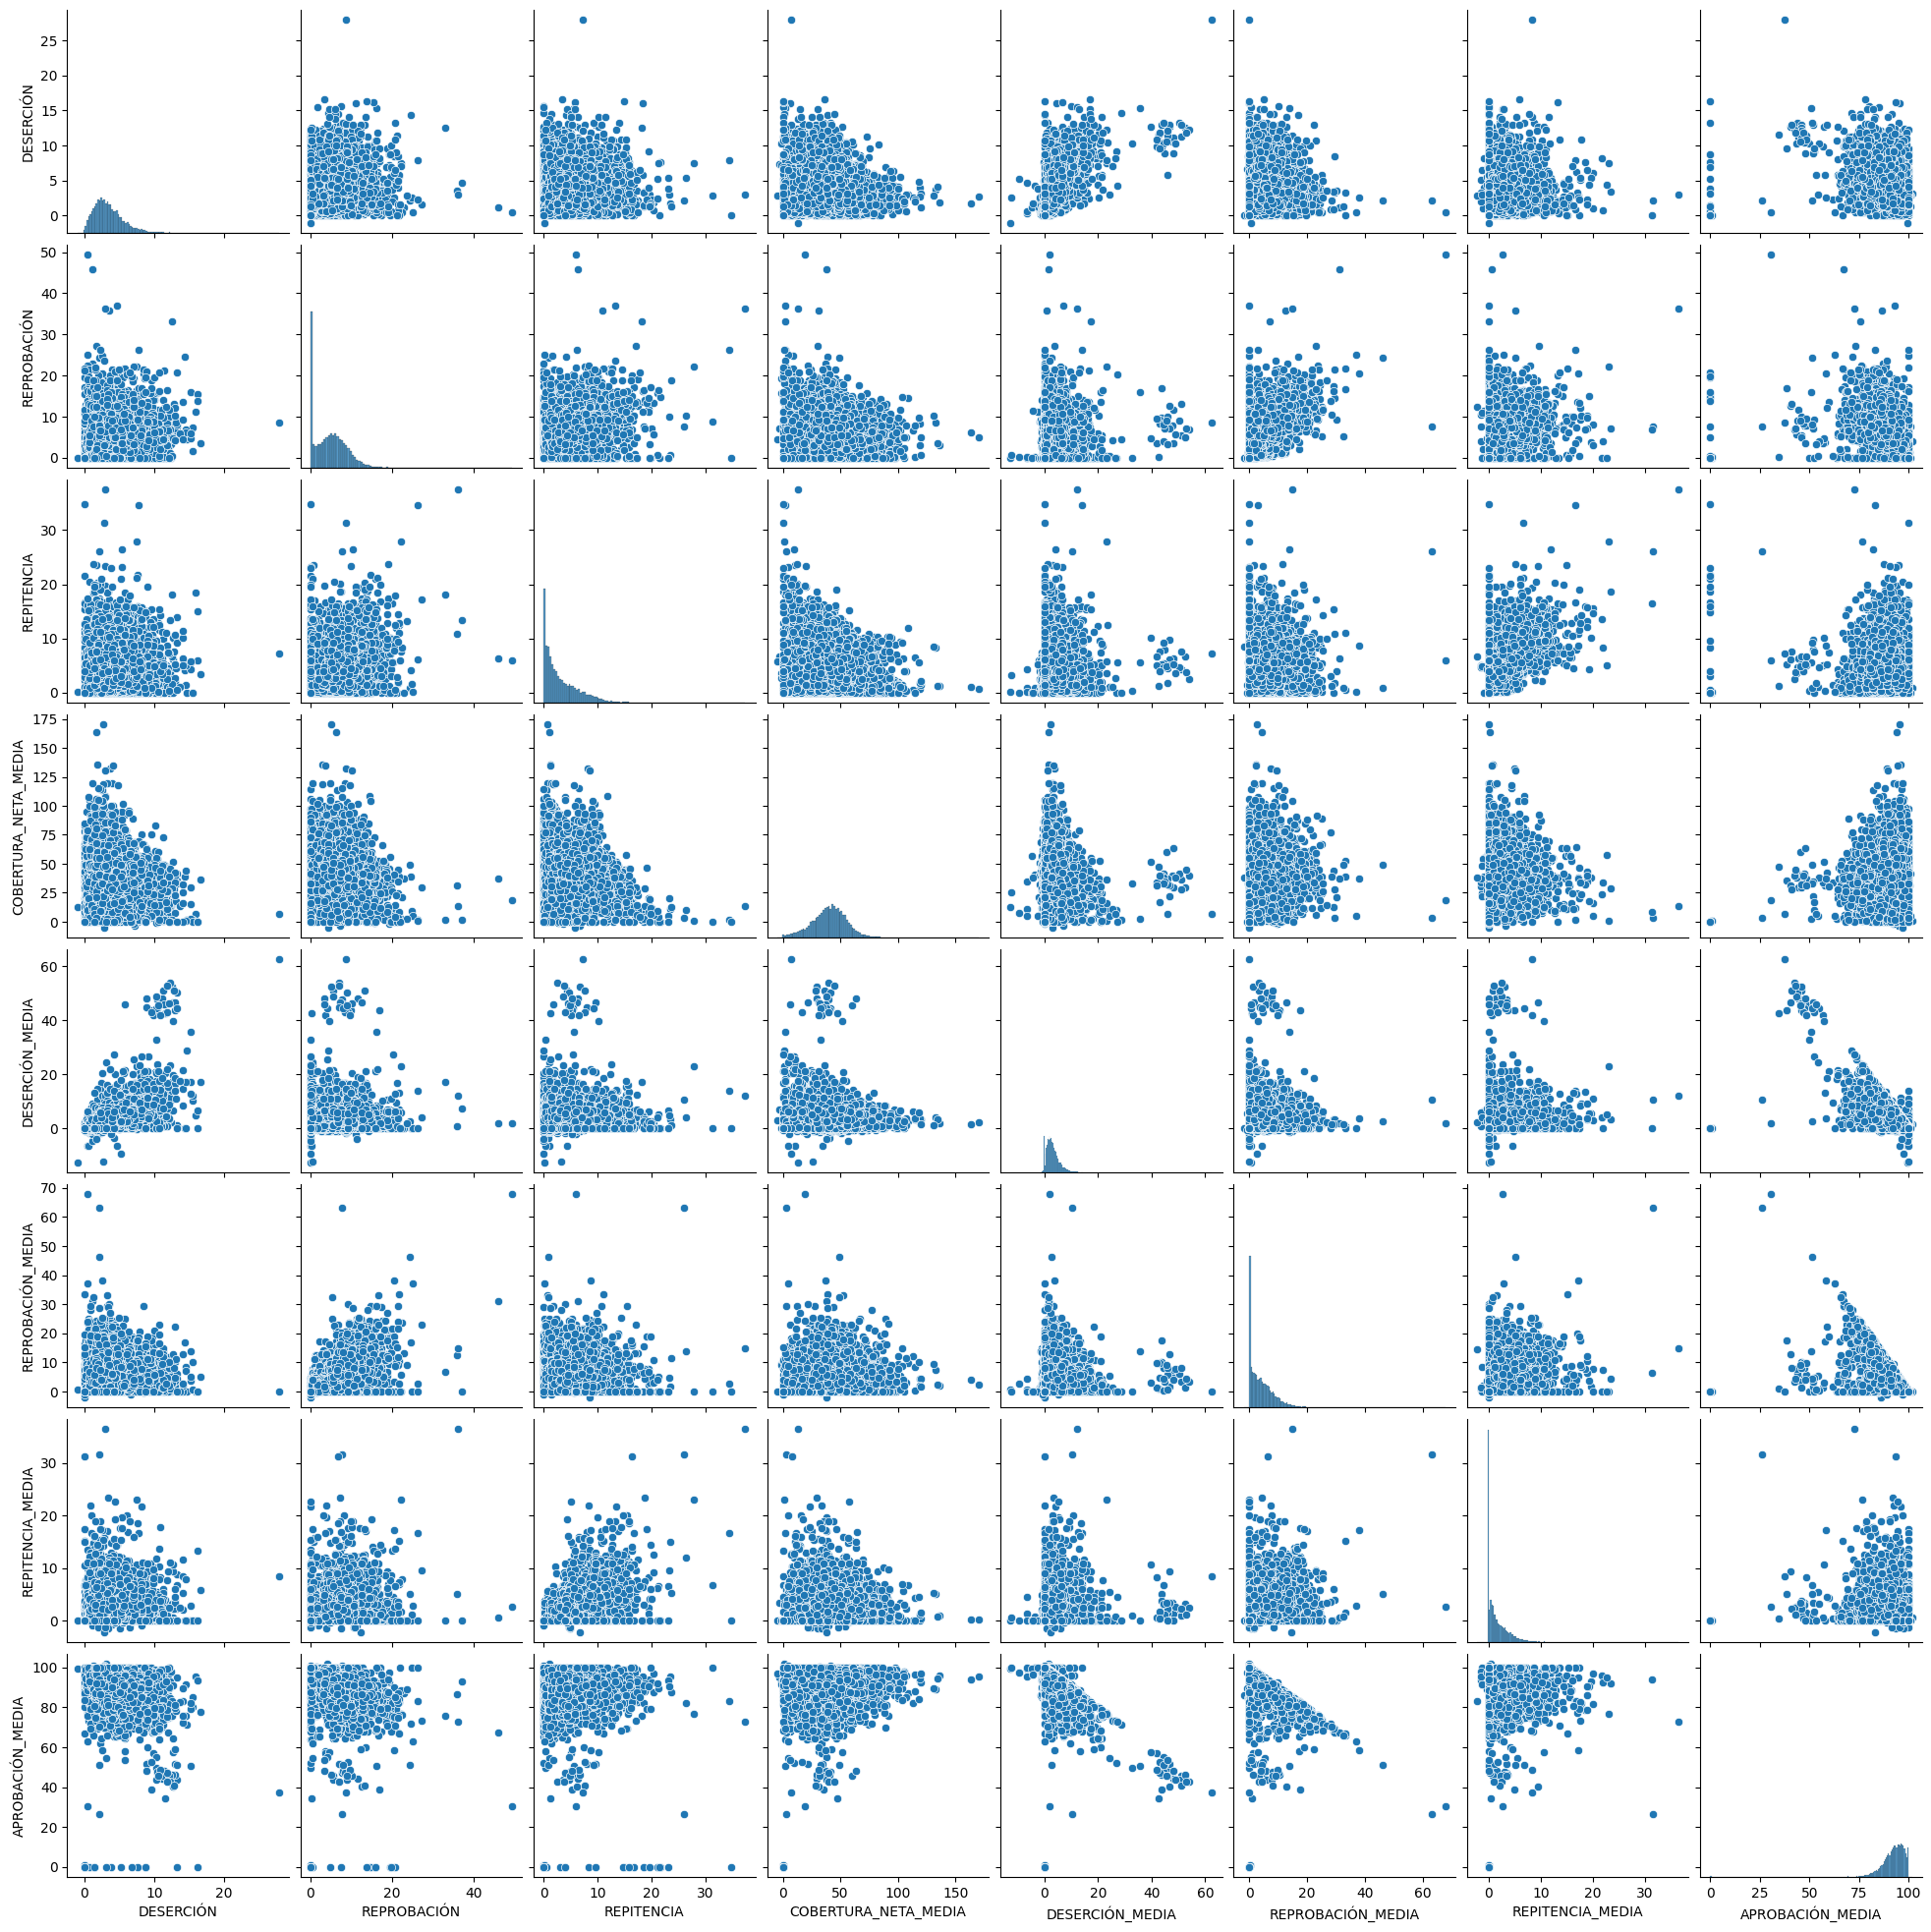

In [19]:
corr_df = df_data[['DESERCIÓN', 'REPROBACIÓN', 'REPITENCIA', 'COBERTURA_NETA_MEDIA',
                               'DESERCIÓN_MEDIA', 'REPROBACIÓN_MEDIA', 'REPITENCIA_MEDIA','APROBACIÓN_MEDIA',
                               ]]

sns.pairplot(corr_df)

corr_df.corr()

<b>Interpretación</b>

La gráfica refuerza la evidencia previa: las variables más fuertemente asociadas con DESERCIÓN_MEDIA son las que miden rendimiento académico en el nivel media.

La dispersión de los datos indica que hay varios factores combinados, pero se mantiene una línea clara:
A mayor reprobación o repitencia → mayor deserción; a mayor aprobación → menor deserción.

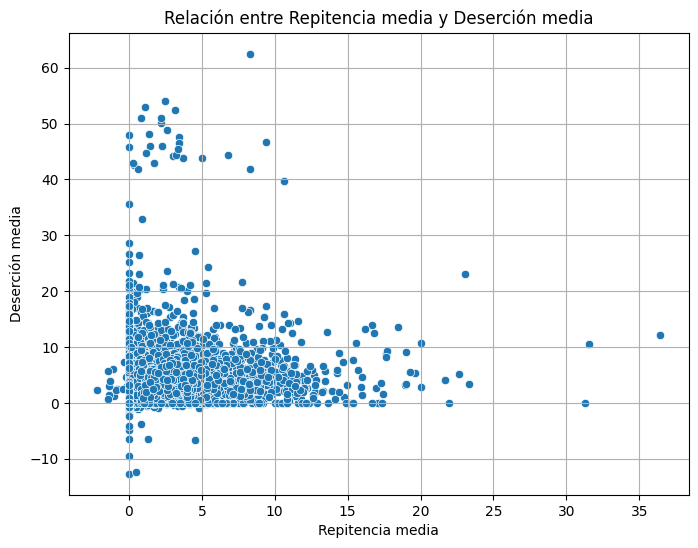

In [20]:
# 2. Repitencia media vs Deserción media
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_data, x='REPITENCIA_MEDIA', y='DESERCIÓN_MEDIA')
plt.title('Relación entre Repitencia media y Deserción media')
plt.xlabel('Repitencia media')
plt.ylabel('Deserción media')
plt.grid(True)
plt.savefig("repitencia_vs_desercion.png", dpi=300)
plt.show()


<b>Interpretación</b>

La mayoría de los puntos se concentran en la parte inferior izquierda del gráfico, lo que indica que, en general, la mayoría de las observaciones tienen tasas bajas tanto de repitencia como de deserción (aproximadamente por debajo de 10% en ambos casos).

Existe una relación positiva, aunque débil y con alta variabilidad, entre la repitencia media y la deserción media. Es decir, las instituciones o cohortes con mayores tasas de repitencia tienden a tener mayores tasas de deserción, pero esta relación no es consistente en todos los casos.

 ### <b><font color="#268fbe"> 4. Mapas con Geopandas</font></b>

 #### <b><font color="#551bb3"> 4.1 Desarrollo de GeoDataFrame </font></b>

In [21]:
#establecimientos = pd.read_csv("ESTABLECIMIENTOS_EDUCATIVOS.csv")
estadisticas = pd.read_csv("../data/ESTADISTICAS_EN_EDUCACION.csv")

In [22]:
municipios = gpd.read_file("../data/COL_Municipio.zip")

In [23]:
estadisticas.head()

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2023,5001,Medellín,5,Antioquia,3759.0,Medellín,377562,96.15,95.94,...,9.23,0.15,6.21,15.40,7.27,9.25,1.82,8.34,13.69,4.48
1,2023,5002,Abejorral,5,Antioquia,3758.0,Antioquia (ETC),3634,74.38,74.38,...,7.77,0.56,7.26,10.93,4.41,9.07,1.67,10.28,11.32,2.20
2,2023,5004,Abriaquí,5,Antioquia,3758.0,Antioquia (ETC),503,62.62,62.62,...,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
3,2023,5021,Alejandría,5,Antioquia,3758.0,Antioquia (ETC),864,81.37,81.37,...,7.88,0.00,7.02,13.65,2.40,7.20,1.59,7.69,11.65,0.00
4,2023,5030,Amagá,5,Antioquia,3758.0,Antioquia (ETC),5060,78.30,78.30,...,10.71,0.00,9.63,16.48,5.50,12.08,0.29,11.54,18.48,3.98


In [24]:
municipios["ID"] = pd.to_numeric(municipios["ID"])

In [25]:
# Unimos los DataFrames de estadísticas y municipios
datos_merge = estadisticas.merge(municipios, left_on="CÓDIGO_MUNICIPIO", right_on="ID")
datos_merge.head(5)

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,...,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA,ID,TOTPOP_CY,Shape__Are,Shape__Len,cod_dane,geometry
0,2023,5001,Medellín,5,Antioquia,3759.0,Medellín,377562,96.15,95.94,...,1.82,8.34,13.69,4.48,5001,2559097,3.798647e+08,107257.930213,05001000,"POLYGON ((-8423087.868 710530.773, -8423036.11..."
1,2023,5002,Abejorral,5,Antioquia,3758.0,Antioquia (ETC),3634,74.38,74.38,...,1.67,10.28,11.32,2.20,5002,20493,5.155810e+08,128215.738906,05002000,"POLYGON ((-8400992.107 663049.702, -8400902.90..."
2,2023,5004,Abriaquí,5,Antioquia,3758.0,Antioquia (ETC),503,62.62,62.62,...,0.00,10.46,13.76,2.04,5004,2763,2.935562e+08,88851.398989,05004000,"POLYGON ((-8469712.412 753218.991, -8469679.34..."
3,2023,5021,Alejandría,5,Antioquia,3758.0,Antioquia (ETC),864,81.37,81.37,...,1.59,7.69,11.65,0.00,5021,4746,1.294922e+08,75725.519153,05021000,"POLYGON ((-8352494.01 715689.897, -8352304.867..."
4,2023,5030,Amagá,5,Antioquia,3758.0,Antioquia (ETC),5060,78.30,78.30,...,0.29,11.54,18.48,3.98,5030,31600,8.456353e+07,50667.719094,05030000,"POLYGON ((-8425665.892 679202.38, -8425597.038..."


In [26]:
# Convertimos el DataFrame a GeoDataFrame
gdf = gpd.GeoDataFrame(datos_merge, geometry="geometry")

 #### <b><font color="#551bb3"> 4.2 Mapas </font></b>

<Axes: >

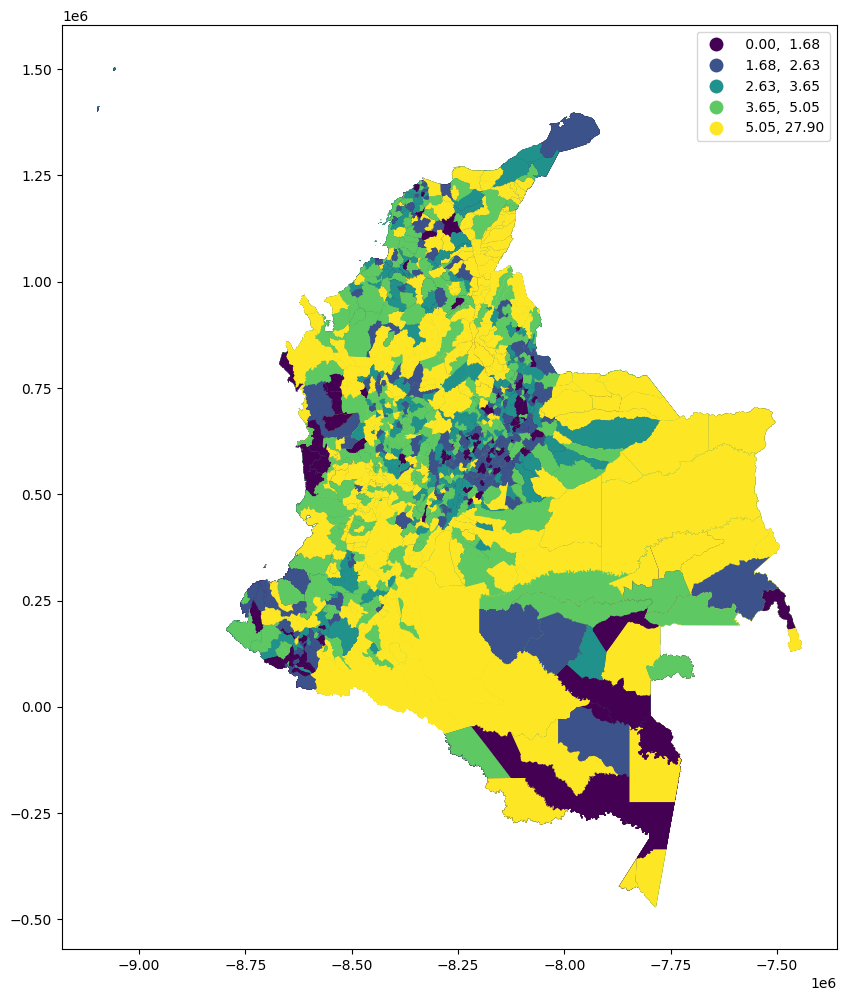

In [27]:
gdf.plot(figsize=(20, 12), column = "DESERCIÓN", scheme="QUANTILEs", k= 5 ,legend=True)


In [28]:
import sys
print(sys.executable)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\python.exe
